In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from PIL import Image
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Data Exploration

In [5]:
# download dataset
# reference: https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/
# NOTE: Need to upload kaggle.json file manually if it does not exist in Files (for Google Colab)

!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download ashishjangra27/face-mask-12k-images-dataset
!unzip face-mask-12k-images-dataset.zip

mkdir: /Users/stefanto/.kaggle: File exists
face-mask-12k-images-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  face-mask-12k-images-dataset.zip
  inflating: Face Mask Dataset/Test/WithMask/1163.png  
  inflating: Face Mask Dataset/Test/WithMask/1174.png  
  inflating: Face Mask Dataset/Test/WithMask/1175.png  
  inflating: Face Mask Dataset/Test/WithMask/1203.png  
  inflating: Face Mask Dataset/Test/WithMask/1361.png  
  inflating: Face Mask Dataset/Test/WithMask/1362.png  
  inflating: Face Mask Dataset/Test/WithMask/1363.png  
  inflating: Face Mask Dataset/Test/WithMask/1388.png  
  inflating: Face Mask Dataset/Test/WithMask/1389.png  
  inflating: Face Mask Dataset/Test/WithMask/1404.png  
  inflating: Face Mask Dataset/Test/WithMask/1405.png  
  inflating: Face Mask Dataset/Test/WithMask/1407.png  
  inflating: Face Mask Dataset/Test/WithMask/1413.png  
  inflating: Face Mask Dataset/Test/WithMask/1439.png  
  inflating: 

In [6]:
# check how many images and their sizes

# obtain paths
test_mask_path = './Face Mask Dataset/Test/WithMask'
test_nomask_path = './Face Mask Dataset/Test/WithoutMask'
train_mask_path = './Face Mask Dataset/Train/WithMask'
train_nomask_path = './Face Mask Dataset/Train/WithoutMask'
val_mask_path ='./Face Mask Dataset/Validation/WithMask'
val_nomask_path = './Face Mask Dataset/Validation/WithoutMask'

# os.listdir gets all files in a given path
image_count = 0
image_sizes = set()
for i in os.listdir(test_mask_path):
  image_count += 1
  im = Image.open(os.path.abspath(test_mask_path + "/" + i))
  width, height = im.size
  image_sizes.add((width, height))
for i in os.listdir(test_nomask_path):
  image_count += 1
  im = Image.open(os.path.abspath(test_nomask_path + "/" + i))
  width, height = im.size
  image_sizes.add((width, height))
for i in os.listdir(train_mask_path):
  image_count += 1
  im = Image.open(os.path.abspath(train_mask_path + "/" + i))
  width, height = im.size
  image_sizes.add((width, height))
for i in os.listdir(train_nomask_path):
  image_count += 1
  im = Image.open(os.path.abspath(train_nomask_path + "/" + i))
  width, height = im.size
  image_sizes.add((width, height))
for i in os.listdir(val_mask_path):
  image_count += 1
  im = Image.open(os.path.abspath(val_mask_path + "/" + i))
  width, height = im.size
  image_sizes.add((width, height))
for i in os.listdir(val_nomask_path):
  image_count += 1
  im = Image.open(os.path.abspath(val_nomask_path + "/" + i))
  width, height = im.size
  image_sizes.add((width, height))

#image_count = len(list(data_dir.glob('*/*.jpg')))
print("Total images:", image_count)
print("Image sizes (Width, Height):", image_sizes)

Total images: 11792
Image sizes (Width, Height): {(84, 84), (61, 61), (116, 116), (126, 126), (153, 153), (57, 57), (122, 122), (117, 117), (94, 94), (58, 58), (25, 25), (35, 35), (90, 90), (150, 150), (127, 127), (338, 338), (31, 31), (91, 91), (123, 123), (68, 68), (63, 63), (32, 32), (64, 64), (330, 330), (59, 59), (124, 124), (101, 101), (156, 156), (65, 65), (97, 97), (92, 92), (33, 33), (88, 88), (98, 98), (125, 125), (70, 70), (29, 29), (39, 39), (66, 66), (121, 121), (131, 131), (158, 158), (62, 62), (72, 72), (44, 44), (99, 99), (95, 95), (40, 40), (155, 155), (132, 132), (36, 36), (224, 224), (96, 96), (73, 73), (128, 128), (284, 284), (69, 69), (129, 129), (106, 106), (37, 37), (102, 102), (47, 47), (42, 42), (139, 139), (43, 43), (134, 134), (38, 38), (103, 103), (80, 80), (135, 135), (130, 130), (75, 75), (140, 140), (34, 34), (76, 76), (71, 71), (136, 136), (168, 168), (108, 108), (173, 173), (67, 67), (77, 77), (49, 49), (104, 104), (114, 114), (563, 563), (100, 100), (4

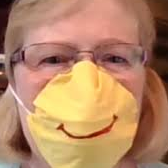

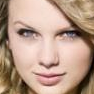

In [7]:
# view images
#pictures = list(data_dir.glob('name_of_file/*'))
#PIL.Image.open(str(name_of_file[0]))

# view some example images
mask_im = Image.open(os.path.abspath(test_mask_path + "/1174.png"))
nomask_im = Image.open(os.path.abspath(test_nomask_path + "/3006.png"))
display(mask_im)
display(nomask_im)

In [8]:
# class names
# should be mask or no mask
#class_names = train_ds.class_names
class_names = ['Masked', 'Not masked']
print(class_names)

['Masked', 'Not masked']


Based on the information from Kaggle, the images don't seem to be standardized so they will have to undergo some sort of scaling. Standardization requires normally distributed data so the pictures will have to be normalized first if they are to be standardized. Cropping the images does not seem necessary as virtually all of the image data are concise headshots of people with or without masks. 